In [ ]:
import random
import logging
from os.path import basename, join
import numpy as np
from scripts.create_siddata_dataset import load_mds, display_mds
from src.main.util.pretty_print import pretty_print as print
from src.static.settings import SID_DATA_BASE

n_dims = 100
names, descriptions, mds = load_mds(join(SID_DATA_BASE, f"siddata_names_descriptions_mds_{n_dims}.json")) 
mins = np.argmin(np.ma.masked_equal(mds.dissimilarity_matrix_, 0.0, copy=False), axis=0)

In [ ]:
display_mds(mds, names, max_elems=2)

<span style="font-size:10pt"><span style="color: #0000ff">Roberto Arlt y la novela argentina a principios del siglo XX</span> is most similar to <span style="color: #0000ff">A2 Französisch Grundkurs II</span></span>

<span style="font-size:10pt"><span style="color: #0000ff">Didaktik I: Grundfragen der Didaktik (Tutorium 4)</span> is most similar to <span style="color: #0000ff">FFA Spanisch  - Derecho Administrativo</span></span>

In [ ]:
from scripts.start_autoencexplnts_pipeline import make_tsne_df
df3 = make_tsne_df(mds, names, 3)
df2 = make_tsne_df(mds, names, 2)

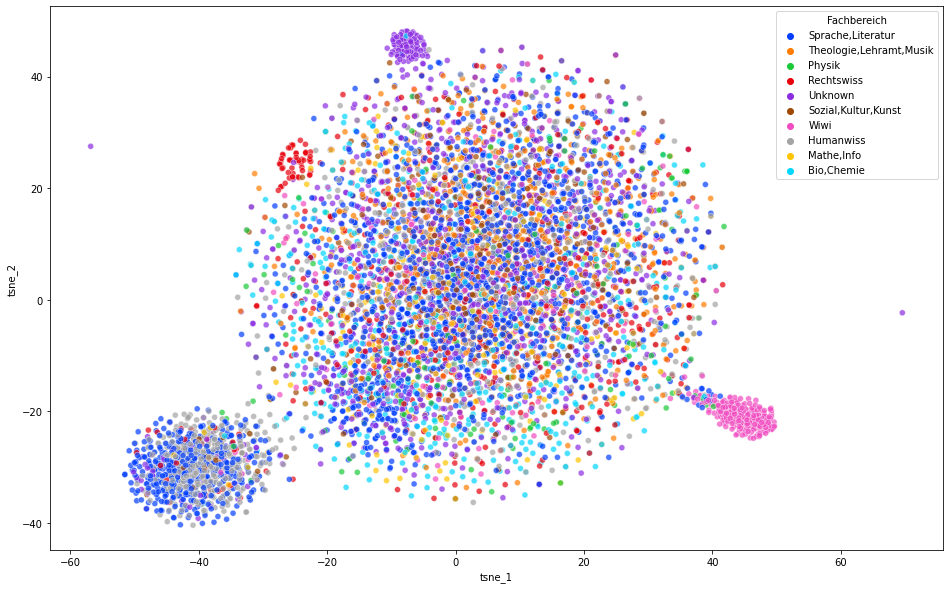

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

df = df2
fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="FB_long",
    palette=sns.color_palette("bright", 10),
    data=df,
    legend="full",
    alpha=0.7,
    ax=ax
)
ax.legend(loc=0, title="Fachbereich")
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
df = df3
#fig = px.scatter_3d(df, x='tsne_1', y='tsne_2', z='tsne_3', color='FB_long', opacity=0.7)#, size=[2]*len(df))
fig = go.Figure()
for ncol,part_df in enumerate(set(df["FB_long"])):
    fig.add_trace(
        go.Scatter3d(
            name=part_df,
            mode='markers',
            x=df[df["FB_long"] == part_df]["tsne_1"],
            y=df[df["FB_long"] == part_df]["tsne_2"],
            z=df[df["FB_long"] == part_df]["tsne_3"],
            marker=dict(            
                color=ncol,
                size=1.5,
                line=dict(
                    width=0
                )
            ),
        )
    )
#fig.update_layout(showlegend=False)
fig.update_layout(legend= {'itemsizing': 'constant'})
fig.update_layout(margin=dict(l=2,r=2,t=20,b=2))
fig.show()

* Plot is interactive! You can twist & turn and also disable & enable individual categories using the legend!
* What do we see here? Well, there *definitely* is a cluster for WiWi (half of the courses are a very distinct cluster in every call of the graph), but for all others? puuuhhhh, shitty.

## Problem: The data stored in the DATA_BASE looks completeley different!

In [ ]:
from main.load_semanticspaces import load_mds_representation
from src.static.settings import DATA_BASE, MDS_DIMENSIONS

mds = load_mds_representation(DATA_BASE, "courses", MDS_DIMENSIONS)
df2 = make_tsne_df(mds, names, 2)
df = df2
fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="FB_long",
    palette=sns.color_palette("bright", 10),
    data=df,
    legend="full",
    alpha=0.7,
    ax=ax
)
ax.legend(loc=0, title="Fachbereich")
plt.show()